# Exploratory Data Analysis
Climate change is currently heating up the planet, and the devestating impacts of forest fires can be seen every summer. Currently, BC is being swept by forest fires all over the interior and northern parts of the province. Seeing this is what drove the question on whether these impacts are due to climate change. My goal of this EDA is to try and determine if there is any correlation between the amounf of forest fires that happen per year, versus the increase in temperature. To do this, I will start by analyzing some baseline data on the amount of fires in each US state per year, and also looking into the temperature increase in each state per year. Doing this should allow me to see whether there is correlation between the two factors.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dfraw = pd.read_csv("C:/Users/Don/Desktop/DATA 301/Project/FiresNEW.csv", encoding = 'ISO-8859-1', low_memory=False)
dfraw

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63,6063.0,Plumas County
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61,6061.0,Placer County
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,6017.0,El Dorado County
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3,6003.0,Alpine County
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3,6003.0,Alpine County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166748,400482078,ICS209_2016_4363266,INTERAGCY,IA-ICS209,ST/C&L,USTNTNS,Tennessee Division of Forestry,TNTNS,Tennessee Division of Forestry,NaN,...,NaN,125.00,D,36.431667,-84.421667,PRIVATE,TN,Scott,47151.0,Scott County
2166749,400482080,ICS209_2016_4433939,INTERAGCY,IA-ICS209,ST/C&L,USALALS,Alabama Forestry Commission,ALALS,Alabama Forestry Commission,NaN,...,NaN,120.00,D,31.143611,-88.111944,PRIVATE,AL,Washington,1129.0,Washington County
2166750,400482083,ICS209_2017_7335143,INTERAGCY,IA-ICS209,ST/C&L,USALALS,Alabama Forestry Commission,ALALS,Alabama Forestry Commission,NaN,...,NaN,120.00,D,33.920000,-85.310000,PRIVATE,AL,Cleburne,1029.0,Cleburne County
2166751,400482085,ICS209_2017_7186124,INTERAGCY,IA-ICS209,FS,USAROUF,Ouachita National Forest,AROUF,Ouachita National Forest,NaN,...,NaN,110.00,D,34.640000,-93.400000,USFS,AR,Garland,5051.0,Garland County


#### Started to clean up data

In [38]:
df1 = dfraw.drop(columns=["FOD_ID","FPA_ID","SOURCE_SYSTEM_TYPE","SOURCE_SYSTEM","NWCG_REPORTING_AGENCY","NWCG_REPORTING_UNIT_ID","NWCG_REPORTING_UNIT_NAME","SOURCE_REPORTING_UNIT","SOURCE_REPORTING_UNIT_NAME","LOCAL_FIRE_REPORT_ID","LOCAL_INCIDENT_ID","FIRE_CODE","FIRE_NAME","ICS_209_PLUS_INCIDENT_JOIN_ID","ICS_209_PLUS_COMPLEX_JOIN_ID","MTBS_ID","MTBS_FIRE_NAME","COMPLEX_NAME","DISCOVERY_DATE","DISCOVERY_DOY","DISCOVERY_TIME","NWCG_GENERAL_CAUSE","NWCG_CAUSE_AGE_CATEGORY","CONT_DATE","CONT_DOY","CONT_TIME","LATITUDE","LONGITUDE","OWNER_DESCR","COUNTY","FIPS_CODE","FIPS_NAME"])
df1

,FIRE_YEAR,NWCG_CAUSE_CLASSIFICATION,FIRE_SIZE,FIRE_SIZE_CLASS,STATE
0,2005,Human,0.10,A,CA
1,2004,Natural,0.25,A,CA
2,2004,Human,0.10,A,CA
3,2004,Natural,0.10,A,CA
4,2004,Natural,0.10,A,CA
...,...,...,...,...,...
2166748,2016,Human,125.00,D,TN
2166749,2016,Human,120.00,D,AL
2166750,2017,Human,120.00,D,AL
2166751,2017,Human,110.00,D,AR


In [57]:
df1 = df1.drop(df1[df1.NWCG_CAUSE_CLASSIFICATION == 'Human'].index)
df1

,FIRE_YEAR,NWCG_CAUSE_CLASSIFICATION,FIRE_SIZE,FIRE_SIZE_CLASS,STATE
1,2004,Natural,0.25,A,CA
3,2004,Natural,0.10,A,CA
4,2004,Natural,0.10,A,CA
5,2004,Natural,0.10,A,CA
6,2004,Natural,0.10,A,CA
...,...,...,...,...,...
2166737,2016,Missing data/not specified/undetermined,176.00,D,AR
2166738,2017,Missing data/not specified/undetermined,175.00,D,WA
2166742,2014,Missing data/not specified/undetermined,150.00,D,CA
2166743,2016,Missing data/not specified/undetermined,150.00,D,AZ


In [58]:
df1 = df1.drop(df1[df1.NWCG_CAUSE_CLASSIFICATION == 'Missing data/not specified/undetermined'].index)
df1

,FIRE_YEAR,NWCG_CAUSE_CLASSIFICATION,FIRE_SIZE,FIRE_SIZE_CLASS,STATE
1,2004,Natural,0.25,A,CA
3,2004,Natural,0.10,A,CA
4,2004,Natural,0.10,A,CA
5,2004,Natural,0.10,A,CA
6,2004,Natural,0.10,A,CA
...,...,...,...,...,...
2166705,2017,NaN,1200.00,F,KS
2166706,2017,Natural,1200.00,F,NM
2166724,2016,Natural,441.00,E,AR
2166725,2016,Natural,427.00,E,MT


In [59]:
df1 = df1.dropna()

#### First Graph: Fire Size Class
I wanted to see how many of the fires were small. It was a majority of them. Class A fires are < 1/4 acre. I decided to remove them from the data since they are so small.

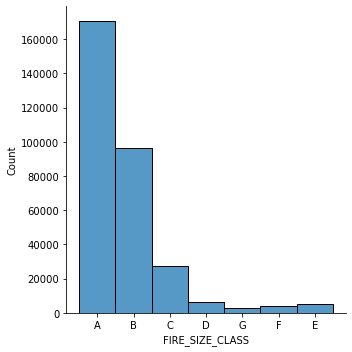

In [60]:
sns.displot(df1, x="FIRE_SIZE_CLASS", discrete=True)

In [61]:
df1 = df1.drop(df1[df1.FIRE_SIZE_CLASS == 'A'].index)
df1

,FIRE_YEAR,NWCG_CAUSE_CLASSIFICATION,FIRE_SIZE,FIRE_SIZE_CLASS,STATE
24,2004,Natural,2.5,B,NM
25,2004,Natural,10.0,C,NM
47,2005,Natural,0.5,B,CO
54,2005,Natural,0.3,B,WA
56,2005,Natural,2.0,B,OR
...,...,...,...,...,...
2166704,2016,Natural,1200.0,F,FL
2166706,2017,Natural,1200.0,F,NM
2166724,2016,Natural,441.0,E,AR
2166725,2016,Natural,427.0,E,MT


#### Second Graph: Fire Size Class
Even though a majority of these fires are Class B, I think they should say since the sized range from 1/4 to 10 acres.

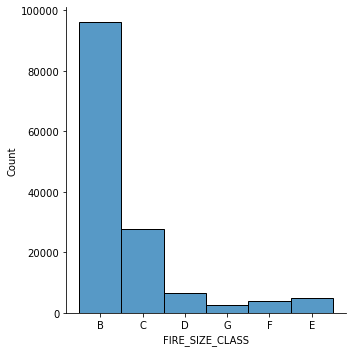

In [62]:
sns.displot(df1, x="FIRE_SIZE_CLASS", discrete=True)

In [63]:
df1 = df1.drop(columns=['NWCG_CAUSE_CLASSIFICATION'])
df1

,FIRE_YEAR,FIRE_SIZE,FIRE_SIZE_CLASS,STATE
24,2004,2.5,B,NM
25,2004,10.0,C,NM
47,2005,0.5,B,CO
54,2005,0.3,B,WA
56,2005,2.0,B,OR
...,...,...,...,...
2166704,2016,1200.0,F,FL
2166706,2017,1200.0,F,NM
2166724,2016,441.0,E,AR
2166725,2016,427.0,E,MT


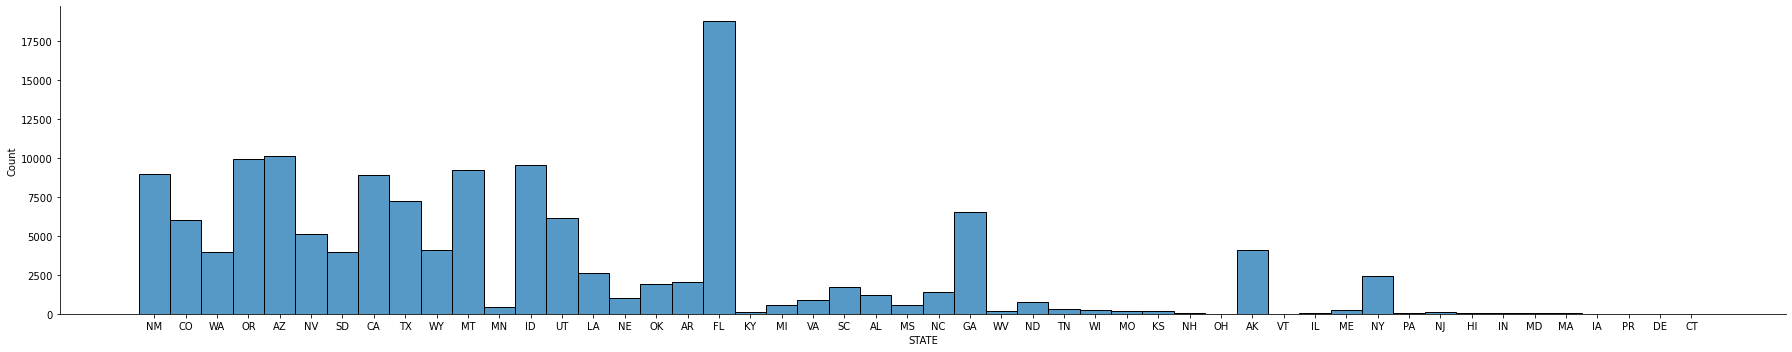

In [143]:
sns.displot(df1, x="STATE", discrete=True,height=5,aspect=5)

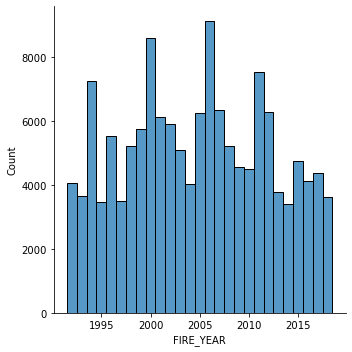

In [66]:
sns.displot(df1, x="FIRE_YEAR", discrete=True)

#### Second dataset
Adding a second dataset to transform states from abbreviation to full name

In [67]:
dfstate = pd.read_csv("C:/Users/Don/Desktop/DATA 301/Project/csvData.csv")
dfstate = dfstate.drop(columns='Abbrev')
dfstate = dfstate.rename(columns={'Code':'STATE'})
dfstate

,State,STATE
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [68]:
df2 = df1.set_index('STATE').combine_first(dfstate.set_index('STATE'))
df2.reset_index(inplace=True)
df2 = df2.drop(columns='STATE')
df2 = df2.dropna()
df2['FIRE_YEAR'] = df2['FIRE_YEAR'].astype(int)
df2 = df2.rename(columns={'FIRE_YEAR':'Date','State':'Location'})
df2


,FIRE_SIZE,FIRE_SIZE_CLASS,Date,Location
0,10.0,C,2009,Alaska
1,1.0,B,1993,Alaska
2,1.0,B,1993,Alaska
3,0.5,B,1997,Alaska
4,4.0,B,1999,Alaska
...,...,...,...,...
142214,500.0,E,2018,Wyoming
142215,4.0,B,2018,Wyoming
142216,100.0,D,2018,Wyoming
142217,1.0,B,2018,Wyoming


#### Adding a third dataset
Added a third dataset involving temperatures of each state for the last 30 years. Will continue to clean up data

In [101]:
dftemp=pd.read_csv("C:/Users/Don/Desktop/DATA 301/Project/tavg.csv")
dftemp

,Location ID,Location,Date,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,101,Alabama CD 1. Northern Valley,189501,37.7,36,-2.4,40.1
1,101,Alabama CD 1. Northern Valley,189502,32.8,3,-10.3,43.1
2,101,Alabama CD 1. Northern Valley,189503,50.3,53,-0.6,50.9
3,101,Alabama CD 1. Northern Valley,189504,61.2,88,1.4,59.8
4,101,Alabama CD 1. Northern Valley,189505,66.8,42,-1.2,68.0
...,...,...,...,...,...,...,...
522187,4810,Wyoming CD 10. Upper Platte,202102,18.5,30,-3.2,21.7
522188,4810,Wyoming CD 10. Upper Platte,202103,30.9,85,2.9,28.0
522189,4810,Wyoming CD 10. Upper Platte,202104,37.0,51,-0.5,37.5
522190,4810,Wyoming CD 10. Upper Platte,202105,48.3,70,0.9,47.4


In [102]:
f = lambda dftemp : dftemp['Location'].split("CD")
dftemp['Location'] = dftemp.apply(f, axis=1)
dftemp

,Location ID,Location,Date,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,101,"[Alabama , 1. Northern Valley]",189501,37.7,36,-2.4,40.1
1,101,"[Alabama , 1. Northern Valley]",189502,32.8,3,-10.3,43.1
2,101,"[Alabama , 1. Northern Valley]",189503,50.3,53,-0.6,50.9
3,101,"[Alabama , 1. Northern Valley]",189504,61.2,88,1.4,59.8
4,101,"[Alabama , 1. Northern Valley]",189505,66.8,42,-1.2,68.0
...,...,...,...,...,...,...,...
522187,4810,"[Wyoming , 10. Upper Platte]",202102,18.5,30,-3.2,21.7
522188,4810,"[Wyoming , 10. Upper Platte]",202103,30.9,85,2.9,28.0
522189,4810,"[Wyoming , 10. Upper Platte]",202104,37.0,51,-0.5,37.5
522190,4810,"[Wyoming , 10. Upper Platte]",202105,48.3,70,0.9,47.4


In [103]:
g = lambda dftemp : dftemp['Location'].pop(0)
dftemp['Location'] = dftemp.apply(g, axis=1)
dftemp.reset_index()
dftemp

,Location ID,Location,Date,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,101,Alabama,189501,37.7,36,-2.4,40.1
1,101,Alabama,189502,32.8,3,-10.3,43.1
2,101,Alabama,189503,50.3,53,-0.6,50.9
3,101,Alabama,189504,61.2,88,1.4,59.8
4,101,Alabama,189505,66.8,42,-1.2,68.0
...,...,...,...,...,...,...,...
522187,4810,Wyoming,202102,18.5,30,-3.2,21.7
522188,4810,Wyoming,202103,30.9,85,2.9,28.0
522189,4810,Wyoming,202104,37.0,51,-0.5,37.5
522190,4810,Wyoming,202105,48.3,70,0.9,47.4


In [104]:
dftemp = dftemp.drop(columns=['Location ID','Rank','Anomaly (1901-2000 base period)','1901-2000 Mean'])
dftemp

,Location,Date,Value
0,Alabama,189501,37.7
1,Alabama,189502,32.8
2,Alabama,189503,50.3
3,Alabama,189504,61.2
4,Alabama,189505,66.8
...,...,...,...
522187,Wyoming,202102,18.5
522188,Wyoming,202103,30.9
522189,Wyoming,202104,37.0
522190,Wyoming,202105,48.3


In [105]:
dftemp['Celsius'] = (dftemp['Value']-32)*5/9
dftemp['Celsius'] = dftemp['Celsius'].round(1)
dftemp = dftemp.drop(columns=['Value'])
dftemp


,Location,Date,Celsius
0,Alabama,189501,3.2
1,Alabama,189502,0.4
2,Alabama,189503,10.2
3,Alabama,189504,16.2
4,Alabama,189505,19.3
...,...,...,...
522187,Wyoming,202102,-7.5
522188,Wyoming,202103,-0.6
522189,Wyoming,202104,2.8
522190,Wyoming,202105,9.1


In [106]:
dftemp = dftemp.drop(dftemp[dftemp['Date'] % 10 != 7].index)
dftemp

,Location,Date,Celsius
6,Alabama,189507,25.0
18,Alabama,189607,26.6
30,Alabama,189707,26.8
42,Alabama,189807,26.6
54,Alabama,189907,26.6
...,...,...,...
522132,Wyoming,201607,18.9
522144,Wyoming,201707,19.8
522156,Wyoming,201807,19.6
522168,Wyoming,201907,19.1


In [107]:
dftemp['Date'] = dftemp['Date']//100
dftemp['Date'] = dftemp['Date'].astype(int)
dftemp


,Location,Date,Celsius
6,Alabama,1895,25.0
18,Alabama,1896,26.6
30,Alabama,1897,26.8
42,Alabama,1898,26.6
54,Alabama,1899,26.6
...,...,...,...
522132,Wyoming,2016,18.9
522144,Wyoming,2017,19.8
522156,Wyoming,2018,19.6
522168,Wyoming,2019,19.1


In [108]:
dftemp = dftemp.drop(dftemp[dftemp.Date > 2018].index)
dftemp = dftemp.drop(dftemp[dftemp['Date'] < 1992].index)
dftemp = dftemp.reset_index(drop = True)

dftemp


,Location,Date,Celsius
0,Alabama,1992,25.6
1,Alabama,1993,27.6
2,Alabama,1994,24.7
3,Alabama,1995,26.1
4,Alabama,1996,25.4
...,...,...,...
9283,Wyoming,2014,18.9
9284,Wyoming,2015,17.4
9285,Wyoming,2016,18.9
9286,Wyoming,2017,19.8


#### Heat map of Temperature from Date & Location
From this graph, I can see that it kind of looks like temperature is increasing as you progress into the future. It is hard to tell with only 30 years of data though.

<AxesSubplot:xlabel='Date', ylabel='Location'>

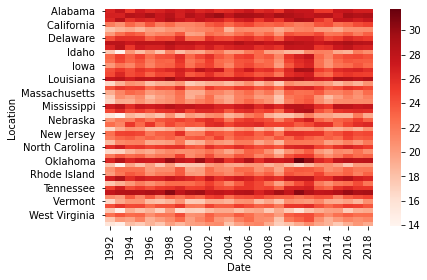

In [117]:
temp = dftemp.pivot_table(index='Location',columns='Date',values='Celsius')
sns.heatmap(temp,cmap='Reds')

In [77]:
dffinal = df2.groupby(['Date','Location']).size()
dffinal = dffinal.to_frame()
dffinal.reset_index(inplace = True)
dffinal = dffinal.drop(dffinal[dffinal.Location == 'Alaska'].index)
dffinal = dffinal.drop(dffinal[dffinal.Location == 'Hawaii'].index)
dffinal = dffinal.sort_values(by=['Location','Date'])
dffinal = dffinal.rename(columns={0: '# of Fires'})
dffinal = dffinal.reset_index(drop=True)
dffinal = dffinal.reset_index(drop=False)
dffinal


,index,Date,Location,# of Fires
0,0,1992,Alabama,2
1,1,1993,Alabama,7
2,2,1994,Alabama,11
3,3,1995,Alabama,55
4,4,1996,Alabama,32
...,...,...,...,...
1058,1058,2014,Wyoming,88
1059,1059,2015,Wyoming,141
1060,1060,2016,Wyoming,182
1061,1061,2017,Wyoming,263


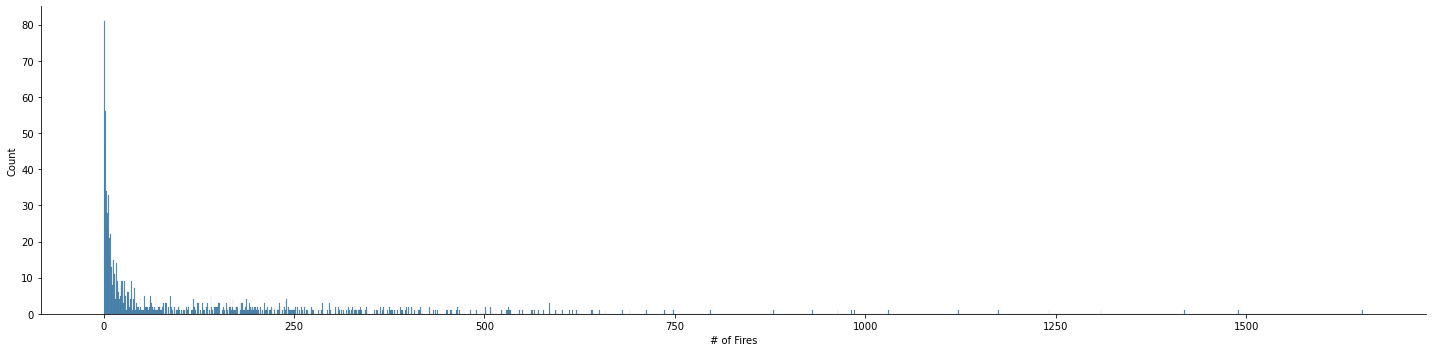

In [153]:
sns.displot(dffinalfy, x="# of Fires", discrete=True,aspect=4)

#### Heat map of # of Fires from Date & Location
From this graph, I can see that it kind of looks like the amount of fires is increasing as you progress into the future. It is hard to tell with only 30 years of data though.

<AxesSubplot:xlabel='Date', ylabel='Location'>

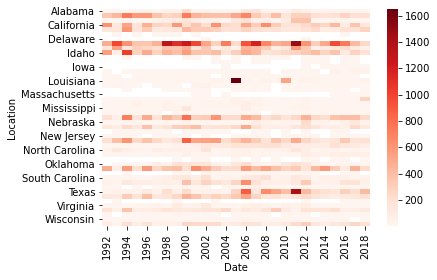

In [155]:
fires = dffinal.pivot_table(index='Location',columns='Date',values='# of Fires')
sns.heatmap(fires,cmap='Reds')

# Exploratory Data Analysis Complete!